<a href="https://colab.research.google.com/github/andy952359/Day3-Pytroch/blob/main/Day3_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
# torch 資料結構，類似numpy的多維矩陣，但可GPU加速
# pytorch 人工智慧框架

In [ ]:
import torch

In [ ]:
!!nvidia-smi

['/bin/bash: line 1: nvidia-smi: command not found']

In [ ]:
#宣告隨機值的2*2tensor矩陣
first_tensor = torch.rand(2, 2)
print(first_tensor)

tensor([[0.8779, 0.4545],
        [0.6614, 0.9022]])


In [ ]:
#宣告值為0的tensor矩陣
#支援type : bool, int8, uint8(像素), int16, int32, int64, half, float(計算), double, bfloat
zero_tensor = torch.zeros(2, 2, dtype = torch.uint8)
print(zero_tensor)

tensor([[0, 0],
        [0, 0]], dtype=torch.uint8)


In [ ]:
#numpy可以直接轉成tensor
#利用torch把numpy包裝起來
import numpy as np
import torch

In [ ]:
#宣告 numppy array
data_np = np.zeros([5, 5])
print(type(data_np))
print(data_np.shape)
print(data_np)

print()

#轉成tensor

data_t = torch.from_numpy(data_np)
print(type(data_t))
print(data_t.shape)
print(data_t)

<class 'numpy.ndarray'>
(5, 5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

<class 'torch.Tensor'>
torch.Size([5, 5])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)


In [ ]:
#直接將資料轉成tensor
#二維的list轉tensor
data = [[1, 2], [3, 4]]
data_t = torch.tensor(data)
print(data_t)

tensor([[1, 2],
        [3, 4]])


In [ ]:
#取得tensor屬性
tensor = torch.rand(3, 4)
print(tensor)
print(f"Shape of tensor : {tensor.shape}")
print(f"Datatype of tensor : {tensor.dtype}")
print(f"Device tensor is stored on : {tensor.device}")

tensor([[0.5489, 0.4932, 0.3872, 0.2319],
        [0.5495, 0.7267, 0.8939, 0.5663],
        [0.0646, 0.1624, 0.2853, 0.4923]])
Shape of tensor : torch.Size([3, 4])
Datatype of tensor : torch.float32
Device tensor is stored on : cpu


In [ ]:
#將tensor放到GPU加速
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

In [ ]:
print(tensor)
print(f"Shape of tensor : {tensor.shape}")
print(f"Datatype of tensor : {tensor.dtype}")
print(f"Device tensor is stored on : {tensor.device}")

tensor([[0.5489, 0.4932, 0.3872, 0.2319],
        [0.5495, 0.7267, 0.8939, 0.5663],
        [0.0646, 0.1624, 0.2853, 0.4923]])
Shape of tensor : torch.Size([3, 4])
Datatype of tensor : torch.float32
Device tensor is stored on : cpu


In [ ]:
#對tensor做數學計算
a = torch.rand(4) * 2 - 1
print(a)
print("取abs，絕對值")
print(torch.abs(a))
print("取ceil，大於該數的整數")
print(torch.ceil(a))
print("取floor，小於該數的整數")
print(torch.floor(a))
print("設定值域，超過0.5 or -0.5的值，以0.5 or -0.5計")
print(torch.clamp(a, -0.5, 0.5))

tensor([-0.3235,  0.1599,  0.5910,  0.0442])
取abs
tensor([0.3235, 0.1599, 0.5910, 0.0442])
取ceil
tensor([-0., 1., 1., 1.])
取floor
tensor([-1.,  0.,  0.,  0.])
設定值域
tensor([-0.3235,  0.1599,  0.5000,  0.0442])


In [ ]:
# 維度操控
# 假設一張4*4的圖片，有RGB三個值
a = torch.rand(3, 4, 4)
# 維度擴展，e.g 疊圖，灰階
b = a.unsqueeze(0)
# 維度縮小
c = b.squeeze(0)
print(a.shape)
print(b.shape)
print(c.shape)

torch.Size([3, 4, 4])
torch.Size([1, 3, 4, 4])
torch.Size([3, 4, 4])


In [ ]:
# aurograd
# pytorch所有神經網路的核心，累積記錄對tensor進行的計算提供自動的反向傳播
# 反向傳播求導數，正向傳播output
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
# 創建一個tensor， 值域為 0~2pi 之間, 共25等分
# requires_grad = True 可以被求導數的，一定要宣告
a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
print(a.shape)
print(a)

torch.Size([25])
tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


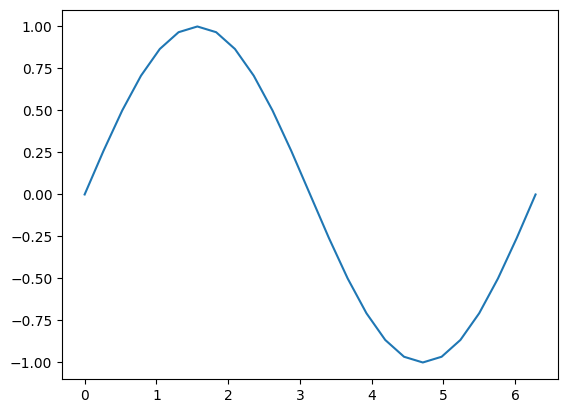

In [ ]:
# 對a做sin函數
b = torch.sin(a)
# detach = 從requires_grad取資料出來，進plt的動作不會被autorad紀錄
# 畫出a及b的圖
plt.plot(a.detach(), b.detach())
# autograd的紀錄印出來
print(b)

In [ ]:
c = 2 * b
print(c)
d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [ ]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [ ]:
# 印出所有grad函式
print("d:")
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print("\nc:")
print(c.grad_fn)
print("\nb:")
print(b.grad_fn)
print("\na:")
print(a.grad_fn)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


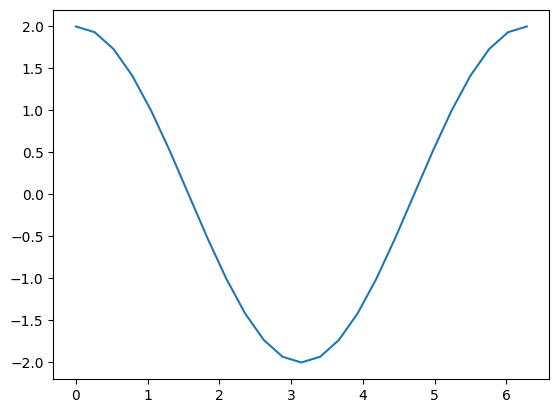

In [ ]:
# 取得導數
out.backward()
# 取完導數後的值
print(a.grad)
# 畫出關係圖
plt.plot(a.detach(), a.grad.detach())

In [ ]:
# torch.nn
# 打造神經網路的工具，建立網路模型
import torch
import torch.nn as nn
import torch.nn.functional as F

# 宣告Net的類別，繼承nn.Module類別
class Net(nn.Module):
  # 模型參數宣告
  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 5*5 sqaure convolution
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    # 6 input image channel(follow conv1 outputchannel)
    #, 16 output channels, 5*5 sqaure convolution
    self.conv2 = nn.Conv2d(6, 16, 5)
    # 建立三層Fully Connected Layer
    # an addine operation : y = Wx + b
    # 16層tensor的channel，疊的有多深
    # 縮減到120
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # 模型運算
  def forward (self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    # 攤平三維(16*5*5)轉換視角成一維(1*400)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:] # all dimensions except the batch dimension
    num_feature = 1
    for s in size :
      num_feature *= s
    return num_feature



In [ ]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
#建立一個4d tensor，假設是一張圖片
import torch.nn as nn
import torch
input = torch.randn(1, 3, 32, 32)
print(input.shape)

torch.Size([1, 3, 32, 32])


In [ ]:
# 做convolution, input channel = 3的圖片, output channel = 32的特徵值, kernel size = 3*3, stride位移pixel = 1
m = nn.Conv2d(3, 32, 3, stride = 1)
output = m(input)
print(output.shape)


torch.Size([1, 32, 30, 30])


In [ ]:
# padding = 1 while kernel = 3 ，圖片維持尺寸
m = nn.Conv2d(3, 32, 3, stride = 1, padding = 1)
output = m(input)
print(output.shape)


torch.Size([1, 32, 32, 32])


In [ ]:
import torch.nn as nn
import torch
input = torch.randn(1, 3, 32, 32)
print(input.shape)

m = nn.Conv2d(3, 32, 3, stride = 1)
output = m(input)
print(output.shape)


m = nn.Conv2d(3, 32, 3, stride = 2)
output = m(input)
print(output.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 32, 30, 30])
torch.Size([1, 32, 15, 15])


In [ ]:
# Linear計算 fully connecting layer
# input feature 需要是一維的
input = torch.randn(256)
print (input.shape)
# 將256長度的資料經計算後縮減成長度32的資料
m = nn.Linear(256, 32)
output = m(input)
print(output.size())

torch.Size([256])
torch.Size([32])


In [ ]:
# view 使用，將多為轉成一維(input:圖片(多維) output: 分類結果(一維))
input = torch.randn(1, 3, 32, 32)
# 可以改維度
# 將圖片長寬 2d 轉 1d ， 把32*32的維度壓縮， -1 : 自動計算圖片pixel
input = input.view(1, 3, -1)
print(input.shape)

torch.Size([1, 3, 1024])


In [ ]:
# 將全部縮成1d
input = input.view(-1)
print(input.shape)

torch.Size([3072])


In [ ]:
m = nn.Linear(3072, 1024)
output = m(input)
print(output.shape)

torch.Size([1024])


In [ ]:
# nn.ReLU ，激活函數， 去除不要的值
# 只改變值。不改維度，通常皆在nn.Conv2d後面
conv = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
r = nn.ReLU()
input = torch.randn(1, 3, 32, 32)
output = conv(input)
print(output.shape)
output = r(output)
print(output.shape)

torch.Size([1, 32, 32, 32])
torch.Size([1, 32, 32, 32])


In [ ]:
# nn,MaxPool2d ，降維，降低pixel，減少資源使用與抓大概的特徵
# 通常接在nn.Con2d及nn.Relu之後
input = torch.randn(1, 3, 32, 32)
print(input.shape)
# kernel size = 2, stride = 2
m = nn.MaxPool2d(2, stride = 2)
output = m(input)
print(output.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 16, 16])
torch.Size([1, 32, 32, 32])
torch.Size([1, 32, 32, 32])
torch.Size([1, 32, 16, 16])


In [ ]:
conv = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
r = nn.ReLU()
m = nn.MaxPool2d(2, stride = 2)
output = conv(input)
print(output.shape)
output = r(output)
print(output.shape)
output = m(output)
print(output.shape)

In [ ]:
# nn,BatchNorm2d
# 對tensor進行標準化處理，減少離群值的問題，避免梯度消失，不會改變維度
# channel = 3
input = torch.randn(1, 3, 32, 32)
print(input.shape)
# channel = 3
m = nn.BatchNorm2d(3)
output = m(input)
print(output.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])


In [ ]:
# nn.Softmax
# 常用於分類器計算機率時使用，鎖在0~1之間
# 1*10
input = torch.randn(10)
print("原本的tensor")
print(input)
print(input.sum())
m = nn.Softmax(dim = 0)
output = m(input)
print("後來的tensor")
print(output)
print(output.sum())


原本的tensor
tensor([-1.5979, -2.2604,  2.3296,  0.5738, -2.8998, -1.3438, -0.0820,  0.9392,
        -1.8493,  0.7336])
tensor(-5.4569)
後來的tensor
tensor([0.0110, 0.0057, 0.5587, 0.0965, 0.0030, 0.0142, 0.0501, 0.1391, 0.0086,
        0.1132])
tensor(1.0000)


In [ ]:
# 將以上工具包成class
import torch.nn as nn
import torch

#定義模型
class Model(torch.nn.Module):
  #定義會用到的nn
    def __init__(self, input_ch, h, w):
     super(Model, self).__init__()
     # channel input by user, output channel = 15, kernel = 5, padding = 2 while kernel = 5
     self.conv1 = nn.Conv2d(input_ch, 15, kernel_size = 5, padding = 2)
     self.linear1 = torch.nn.Linear(15*h*w, 200)
     self.activation = torch.nn.ReLU()
     self.linear2 = torch.nn.Linear(200, 10)
     self.softmax = torch.nn.Softmax()
  #定義資料進入時如何計算
    def forward (self, x):
      x = self.conv1(x)
      x = self.activation(x)
      x = x.view(-1) #將資料轉為一維
      x = self.linear1(x)
      x = self.activation(x)
      x = self.linear2(x)
      x = self.softmax(x)
      return x

In [ ]:
# model
# input channel = 3, h = 32, w =32
model = Model(3, 32, 32)
print("The model:")
print(model)


The model:
Model(
  (conv1): Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (linear1): Linear(in_features=15360, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


In [ ]:
# input tensor
input = torch.rand(1, 3, 32, 32)
print(input.shape)
output = model(input)
print(output.shape)

torch.Size([1, 3, 32, 32])
torch.Size([10])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
# Dataloader
# 封裝處理訓練資料
# 需要定義Dataset class，包到Dataloder
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    # 影像存在csv，用pandas讀
    self.img_labels = pd.read_csv(annotations_file)
    #影像資料夾位置
    self.img_dir = img_dir
    # 影像前處理
    self.transform = transform
    self.target_transform = target_transform

  # 回傳資料長度
  def __len__(self):
    return len(self.img_labels)

  # 取資料時跟dataloader互動
  def __getitem__(self, idx):
    # dir 影像路徑，iloc 第幾個圖片的位置
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 可改為自訂義dataset

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# 包裝到 dataloader裡
from torch.utils.data import DataLoader
# shuffle 隨機取資料去訓練
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

100%|██████████| 26421880/26421880 [00:05<00:00, 4850984.98it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 324004.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5445589.61it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15760786.13it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print(len(train_dataloader))
print(len(test_dataloader))

938
157


In [ ]:
# Loss function
# 計算網路預測的答案與標準答案的差距
# 分類問題，交叉比對差距
loss_fn = torch.nn.CrossEntropyLoss()

# output模型輸出，label解答
# tensor 4*10，4筆資料，每筆資料有10個機率值
dummy_outputs = torch.rand(4, 10)
# 一維，長度為4的資料，1跟tensor1計算, 5跟tensor2計算, 3跟tensor3計算, 7跟tensor4計算
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

#  計算loss
loss = loss_fn(dummy_outputs, dummy_labels)
print("Total loss for this batch: {}".format(loss.item()))

tensor([[0.1747, 0.3753, 0.7119, 0.3369, 0.0548, 0.4778, 0.8329, 0.3576, 0.2197,
         0.5504],
        [0.1597, 0.8072, 0.8251, 0.9071, 0.3117, 0.0095, 0.5126, 0.3104, 0.2760,
         0.9756],
        [0.1326, 0.8129, 0.1532, 0.6977, 0.6693, 0.3469, 0.7989, 0.2238, 0.7718,
         0.9195],
        [0.6182, 0.2385, 0.8956, 0.8503, 0.6614, 0.4084, 0.7972, 0.8748, 0.8052,
         0.0233]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.374516248703003


In [ ]:
import torch.optim as optim
# SGD優化器， lr學習率(斜率走的速度)
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
##
# for input, target in train_dataloader:
#   # 進model前，清除導數
#   optimizer.zero_grad()
#   output = model(input)
#   loss = loss_fn(output, target)
#   loss.backward()
#   optimizer.step()
##

RuntimeError: Given groups=1, weight of size [15, 3, 5, 5], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

# device = cpu or gpu
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
print(device)

cpu


In [ ]:
# EPOCH 訓練回合數
EPOCH = 1
# 每回合放多少資料
BATCH_SIZE = 50
# optim學習的速度
LR = 0.001

In [ ]:
# 從torchvision下載MNIST資料集
train_data = torchvision.datasets.MNIST(
    root = "./mnist",
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True
)
test_data = torchvision.datasets.MNIST(
    root = "./mnist/",
    train = False
)
# 把dataset包到Dataloader裡
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)

# 分開資料集內的圖片和答案
test_x = torch.unsqueeze(test_data.data, dim = 1).type(torch.FloatTensor) / 255.
test_y = test_data.targets
print ("training data : {} images \n shape: {}".format(len(train_data), train_data[0][0].shape))
print ("testing data : {} images \n shape: {}".format(len(test_data), test_x[0].shape))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35116815.78it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1174102.66it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8507458.16it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1131535.33it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

training data : 60000 images 
 shape: torch.Size([1, 28, 28])
testing data : 10000 images 
 shape: torch.Size([1, 28, 28])


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2)
    self.relu = nn.ReLU()
    self.maxPool = nn.MaxPool2d(kernel_size = 2)
    self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)
    self.fc1 = nn.Linear(32*7*7, 10)

  def forward (self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.maxPool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxPool(x)
    x = x.view(x.size(0), -1)
    output = self.fc1(x)
    return output, x

In [ ]:
model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
optim = torch.optim.Adam(model.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(EPOCH):
  # batch_x 圖片，batch_y 答案
  for step, (batch_x, batch_y) in enumerate(train_loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    optim.zero_grad()
    pred = model(batch_x)[0]
    loss = loss_func(pred, batch_y)
    loss.backward()
    optim.step()

    if step % 50 == 0:
      test_output, last_layer = model(test_x)
      pred_y = torch.max(test_output, 1)[1].data.cpu().numpy()
      accuracy = float((pred_y == test_y.data.cpu().numpy()).astype(int).sum()) / float(test_y.size(0))
      print("Epoch: ", epoch, "Step :" , step, "| train loss: %.4f" % loss.data.numpy(), "| test accuracy: %2f" % accuracy)

Epoch:  0 Step : 0 | train loss: 2.3229 | test accuracy: 0.132800
Epoch:  0 Step : 50 | train loss: 0.4361 | test accuracy: 0.864400
Epoch:  0 Step : 100 | train loss: 0.2801 | test accuracy: 0.911200
Epoch:  0 Step : 150 | train loss: 0.1271 | test accuracy: 0.925000
Epoch:  0 Step : 200 | train loss: 0.1887 | test accuracy: 0.944200
Epoch:  0 Step : 250 | train loss: 0.1620 | test accuracy: 0.947800
Epoch:  0 Step : 300 | train loss: 0.1381 | test accuracy: 0.960500
Epoch:  0 Step : 350 | train loss: 0.1060 | test accuracy: 0.962700
Epoch:  0 Step : 400 | train loss: 0.3307 | test accuracy: 0.962700
Epoch:  0 Step : 450 | train loss: 0.2578 | test accuracy: 0.970700
Epoch:  0 Step : 500 | train loss: 0.1859 | test accuracy: 0.971400
Epoch:  0 Step : 550 | train loss: 0.1164 | test accuracy: 0.972200
Epoch:  0 Step : 600 | train loss: 0.1649 | test accuracy: 0.977700
Epoch:  0 Step : 650 | train loss: 0.0929 | test accuracy: 0.971900
Epoch:  0 Step : 700 | train loss: 0.2104 | test ac

9 prediction number
9 real number


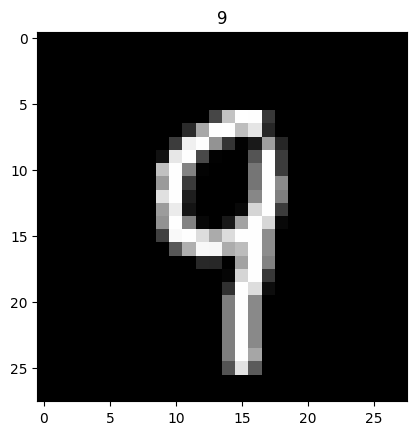

1 prediction number
1 real number


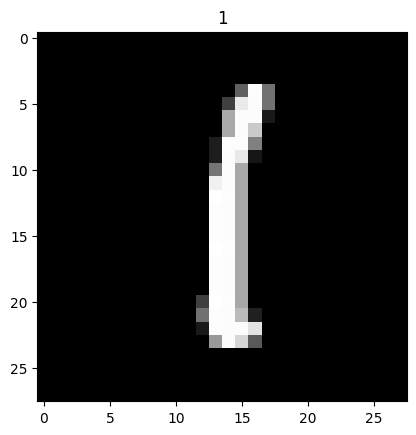

5 prediction number
5 real number


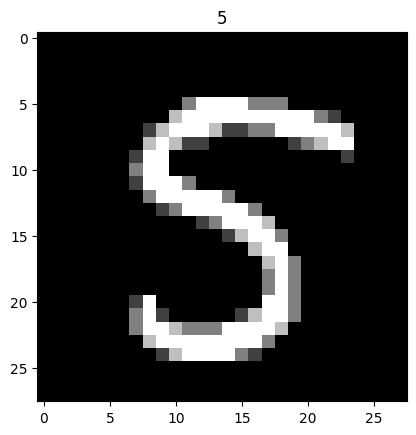

0 prediction number
0 real number


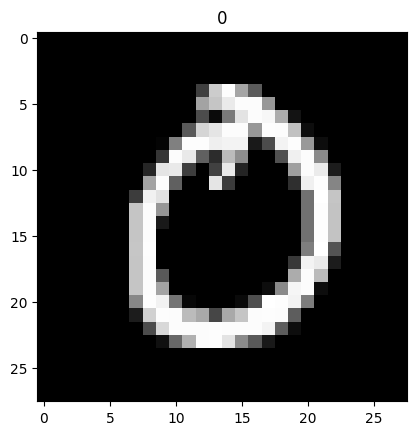

5 prediction number
5 real number


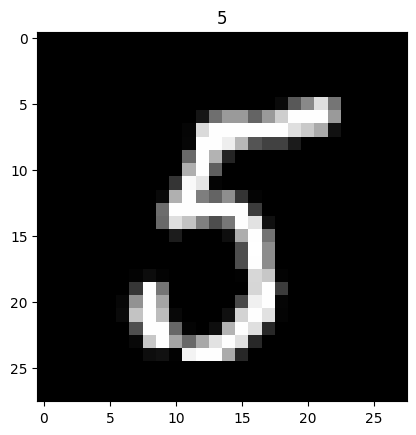

6 prediction number
6 real number


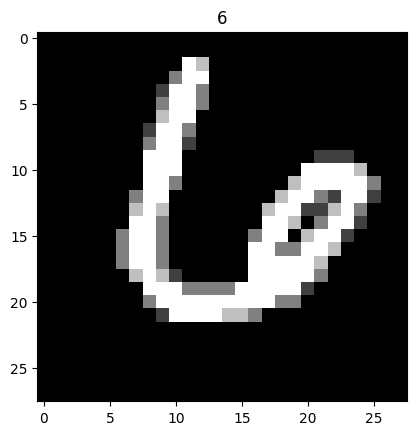

1 prediction number
1 real number


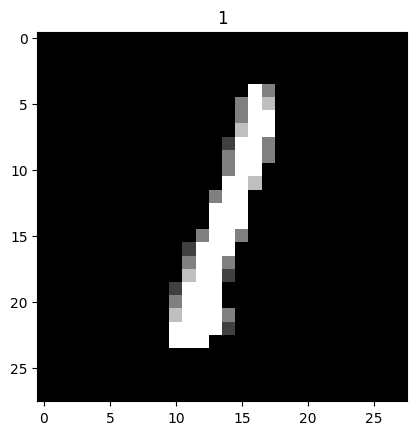

0 prediction number
0 real number


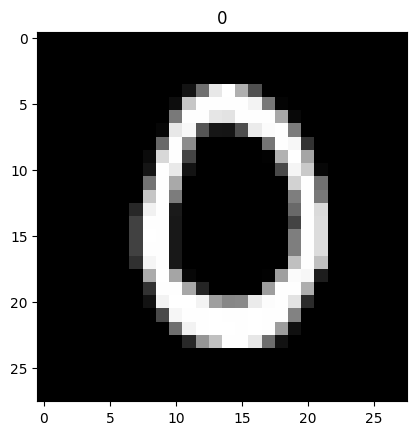

4 prediction number
4 real number


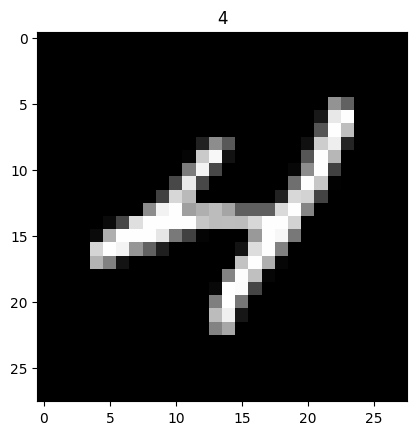

3 prediction number
3 real number


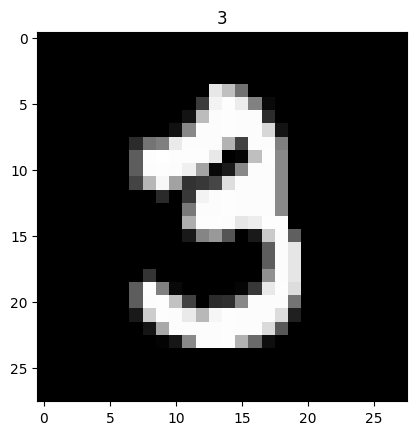

9 prediction number
9 real number


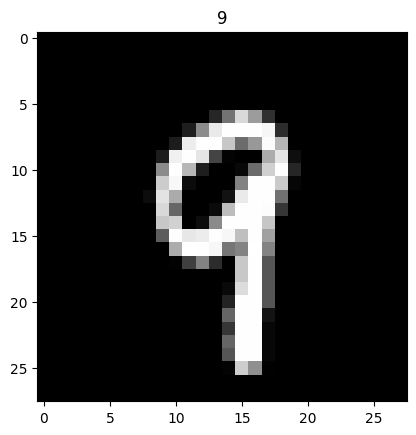

7 prediction number
7 real number


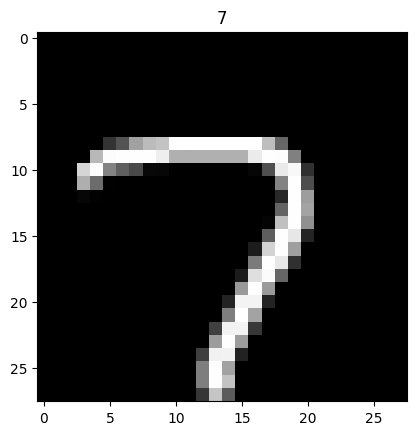

0 prediction number
0 real number


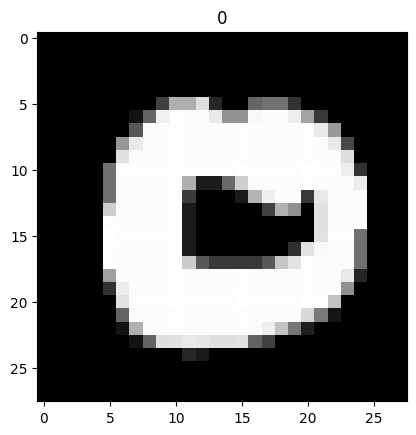

2 prediction number
2 real number


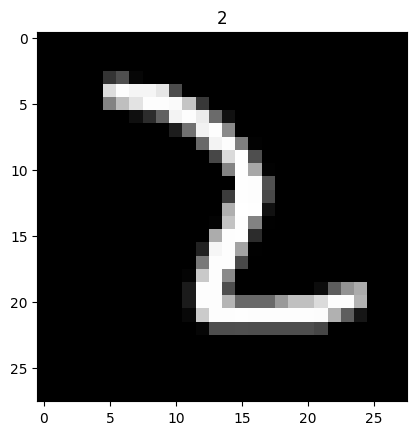

4 prediction number
4 real number


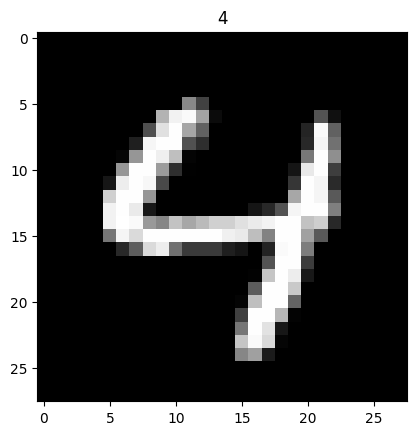

6 prediction number
6 real number


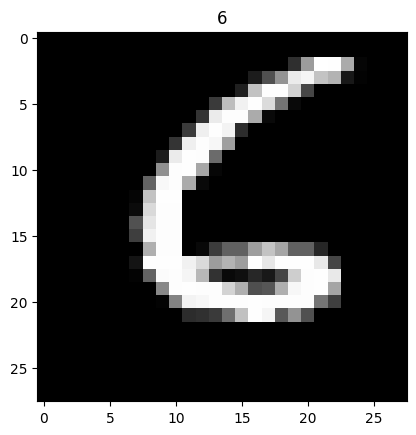

1 prediction number
1 real number


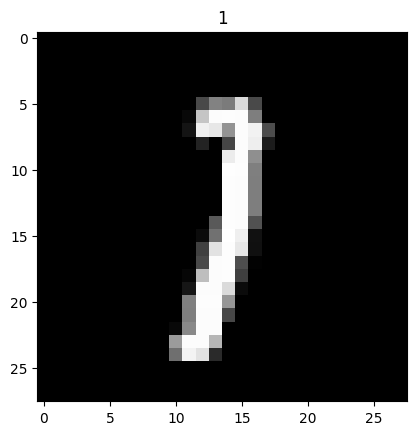

5 prediction number
5 real number


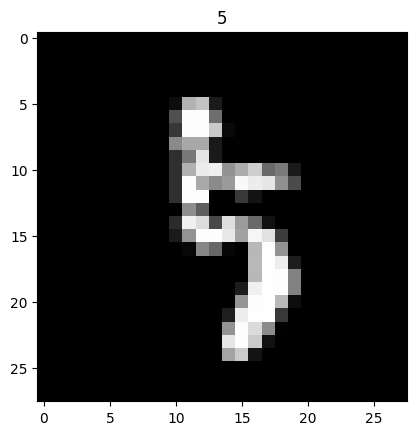

4 prediction number
4 real number


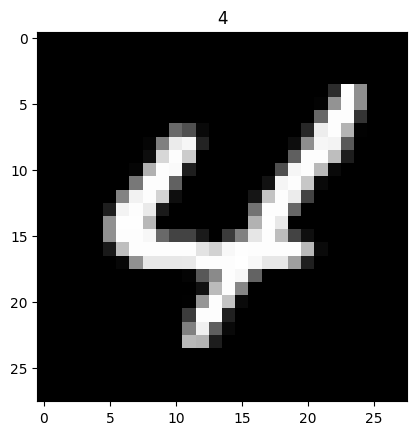

4 prediction number
4 real number


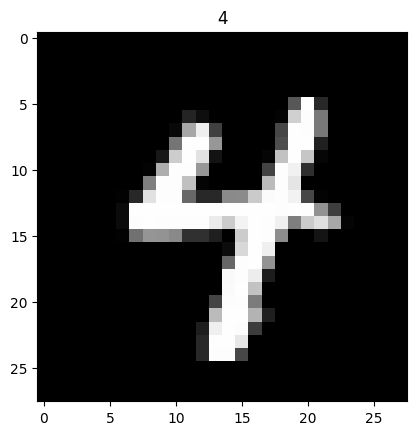

In [ ]:
import random
import matplotlib.pyplot as plt

for test_step in range(20):
  rand_idx = random.randint(0, len(test_x) - 1)
  test_img = test_x[rand_idx].unsqueeze(0)
  test_ans = test_y[rand_idx]
  pred, _ = model(test_img)
  pred_y = torch.max(pred, 1)[1].data.cpu().numpy()
  print(pred_y[0], 'prediction number')
  print(test_ans.data.numpy(), 'real number')
  plt.imshow(test_data.data[rand_idx].numpy(), cmap = 'gray')
  plt.title("%i" % pred_y[0])
  plt.pause(0.5)
plt.show()